### About Dataset

MNIST is a subset of a larger set available from NIST (I copied the dataset from https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/)

#### Context
The MNIST database of handwritten digits has a training set of examples

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('./data/mnist_train.csv')
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T 
x_dev = data_dev[1:n]
y_dev = data_dev[0]

data_train = data[1000:m].T 
y_train = data_train[0]
x_train = data_train[1:n]

x_train[:,0].shape

(784,)

In [26]:
import numpy as np
from math import exp

def init_params():
    """Initialize neural network parameters"""
    w1 = np.random.randn(10, 784) * 0.01  
    b1 = np.zeros((10, 1))
    w2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

def ReLu(z):
    """ReLU activation function"""
    return np.maximum(0, z)

def softmax(z):
    """Softmax activation function with numerical stability"""
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return e_z / np.sum(e_z, axis=0, keepdims=True)

def forward_prop(w1, b1, w2, b2, x):
    """Forward propagation step"""
    x = x.reshape(784, -1)  # Reshape to (784, m) where m is number of examples
    
    z1 = np.dot(w1, x) + b1  # (10, 784) x (784, m) -> (10, m)
    a1 = ReLu(z1)
    z2 = np.dot(w2, a1) + b2  # (10, 10) x (10, m) -> (10, m)
    a2 = softmax(z2)
    
    return z1, a1, z2, a2

def one_hot(y, num_classes=10):
    """Convert labels to one-hot encoded format"""
    m = y.shape[0]
    y_one_hot = np.zeros((num_classes, m))
    y_one_hot[y.astype(int), np.arange(m)] = 1
    return y_one_hot

def deriv_ReLu(z):
    """Derivative of ReLU function"""
    return z > 0

def back_prop(z1, a1, z2, a2, w2, y, x):
    """Backward propagation step"""
    m = x.shape[1]  # Number of examples
    x = x.reshape(784, -1)  # Reshape input
    y = one_hot(y)  # Convert to one-hot
    
    dz2 = a2 - y  # (10, m)
    dw2 = (1/m) * np.dot(dz2, a1.T)  # (10, m) x (m, 10) -> (10, 10)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = np.dot(w2.T, dz2) * deriv_ReLu(z1)  # (10, 10) x (10, m) -> (10, m)
    dw1 = (1/m) * np.dot(dz1, x.T)  # (10, m) x (m, 784) -> (10, 784)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    """Update parameters using gradients"""
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2


In [27]:
def get_predictions(a2):
    """Get predictions from model output"""
    return np.argmax(a2, axis=0)

def get_accuracy(predictions, y):
    """Calculate accuracy of predictions"""
    return np.mean(predictions == y)

def gradient_descent(x, y, iterations, alpha):
    """Training function using gradient descent"""
    # Initialize parameters
    w1, b1, w2, b2 = init_params()
    
    for i in range(iterations):
        # Forward propagation
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        
        # Backward propagation
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, y, x)
        
        # Update parameters
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        
        # Print progress every 10 iterations
        if i % 10 == 0:
            predictions = get_predictions(a2)
            accuracy = get_accuracy(predictions, y)
            print(f"Iteration {i}, Accuracy: {accuracy * 100:.2f}%")
    
    return w1, b1, w2, b2

In [32]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 1000, 0.001)

Iteration 0, Accuracy: 8.49%
Iteration 10, Accuracy: 23.22%
Iteration 20, Accuracy: 44.27%
Iteration 30, Accuracy: 57.18%
Iteration 40, Accuracy: 66.02%
Iteration 50, Accuracy: 71.77%
Iteration 60, Accuracy: 75.72%
Iteration 70, Accuracy: 78.30%
Iteration 80, Accuracy: 80.17%
Iteration 90, Accuracy: 78.48%
Iteration 100, Accuracy: 79.94%
Iteration 110, Accuracy: 82.88%
Iteration 120, Accuracy: 83.07%
Iteration 130, Accuracy: 83.02%
Iteration 140, Accuracy: 84.20%
Iteration 150, Accuracy: 85.11%
Iteration 160, Accuracy: 85.58%
Iteration 170, Accuracy: 85.78%
Iteration 180, Accuracy: 85.92%
Iteration 190, Accuracy: 86.26%
Iteration 200, Accuracy: 86.68%
Iteration 210, Accuracy: 87.02%
Iteration 220, Accuracy: 87.21%
Iteration 230, Accuracy: 87.32%
Iteration 240, Accuracy: 87.42%
Iteration 250, Accuracy: 87.62%
Iteration 260, Accuracy: 87.84%
Iteration 270, Accuracy: 88.02%
Iteration 280, Accuracy: 88.15%
Iteration 290, Accuracy: 88.19%
Iteration 300, Accuracy: 88.22%
Iteration 310, Accur

In [33]:
def test_prediction(x, y, w1, b1, w2, b2, index):
    """
    Test the model on a single example and visualize the image
    
    Parameters:
    x: test data (784, m)
    y: test labels (m,)
    w1, b1, w2, b2: trained parameters
    index: index of example to test
    """
    import matplotlib.pyplot as plt
    
    # Get the example
    current_image = x[:, index]
    current_label = y[index]
    
    # Reshape and make prediction
    current_image = current_image.reshape(784, 1)
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, current_image)
    prediction = get_predictions(a2)
    
    # Print results
    print(f"Prediction: {prediction[0]}")
    print(f"Actual Label: {current_label}")
    
    # Visualize image
    plt.figure(figsize=(2, 2))
    plt.imshow(current_image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Pred: {prediction[0]}, True: {current_label}')
    plt.show()

# Example usage:
# After training the model:
# test_prediction(x_test, y_test, w1, b1, w2, b2, index=0)  # Test first image
# test_prediction(x_test, y_test, w1, b1, w2, b2, index=np.random.randint(0, x_test.shape[1]))  # Test random image

def test_multiple_predictions(x, y, w1, b1, w2, b2, num_examples=5):
    """
    Test and visualize multiple examples
    
    Parameters:
    num_examples: number of random examples to test
    """
    import matplotlib.pyplot as plt
    
    indices = np.random.randint(0, x.shape[1], num_examples)
    
    plt.figure(figsize=(2*num_examples, 2))
    for i, idx in enumerate(indices):
        # Get example and predict
        current_image = x[:, idx:idx+1]
        current_label = y[idx]
        _, _, _, a2 = forward_prop(w1, b1, w2, b2, current_image)
        prediction = get_predictions(a2)
        
        # Plot
        plt.subplot(1, num_examples, i+1)
        plt.imshow(current_image.reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title(f'Pred: {prediction[0]}\nTrue: {current_label}')
    
    plt.tight_layout()
    plt.show()

# Example usage:
# test_multiple_predictions(x_test, y_test, w1, b1, w2, b2, num_examples=5)

Prediction: 4
Actual Label: 6


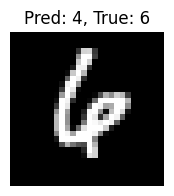

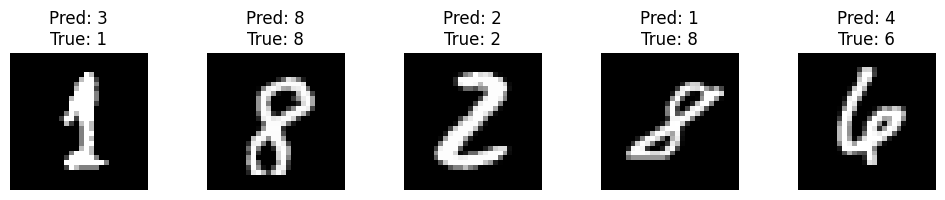

In [34]:
# Create test set
test_indices = np.random.choice(x_dev.shape[1], 100, replace=False)
x_test = x_dev[:, test_indices]
y_test = y_dev[test_indices]

# Test single image
test_prediction(x_test, y_test, w1, b1, w2, b2, index=0)

# Test multiple images
test_multiple_predictions(x_test, y_test, w1, b1, w2, b2, num_examples=5)